The dataset can be found on this Kaggle page - Time Series Datasets
https://www.kaggle.com/shenba/time-series-datasets#monthly-beer-production-in-austr.csv

Read the data and create a time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data and create a time series

In [3]:
# import dataset and create Pandas Series
ausbeer= pd.read_csv('beer_data.csv', header=0, index_col=0, parse_dates=['Month'],squeeze = True)
ausbeer.head()

Month
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production, dtype: float64

In [4]:
type(ausbeer)

pandas.core.series.Series

In [5]:
ausbeer.size

476

In [6]:
ausbeer.describe()

count    476.000000
mean     136.395378
std       33.738725
min       64.800000
25%      112.900000
50%      139.150000
75%      158.825000
max      217.800000
Name: Monthly beer production, dtype: float64

In [7]:
ausbeer.isnull()

Month
1956-01-01    False
1956-02-01    False
1956-03-01    False
1956-04-01    False
1956-05-01    False
              ...  
1995-04-01    False
1995-05-01    False
1995-06-01    False
1995-07-01    False
1995-08-01    False
Name: Monthly beer production, Length: 476, dtype: bool

Determine rolling mean to understand stionarity:

In [8]:
rol_mean1 = ausbeer.rolling(window=12).mean()
rol_mean1

Month
1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
                 ...    
1995-04-01    146.166667
1995-05-01    147.833333
1995-06-01    148.250000
1995-07-01    147.583333
1995-08-01    148.416667
Name: Monthly beer production, Length: 476, dtype: float64

Plot the time series. What do you see in the graph? Does the data have seasonality or trend? Is it stationary?

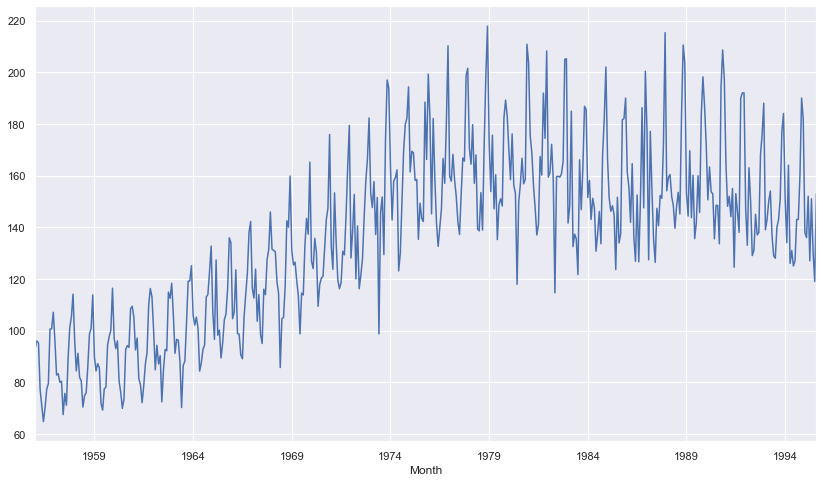

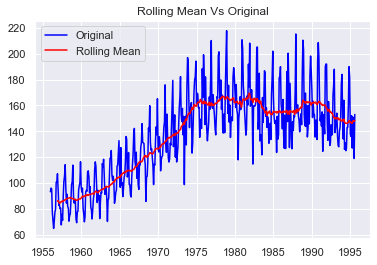

In [9]:
from matplotlib import pyplot
ausbeer.plot(figsize=(14,8)).autoscale(axis ='x', tight=True);
pyplot.show()
Orig = plt.plot(ausbeer, color = 'blue', label = 'Original')
mean = plt.plot (rol_mean1, color ='red', label ='Rolling Mean')
plt.legend (loc ='best')
plt.title ('Rolling Mean Vs Original')
plt.show(block=False)

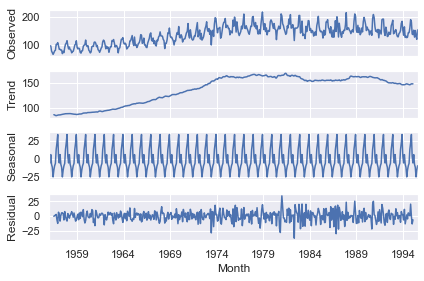

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ausbeer, model='additive')
result.plot()
pyplot.show()

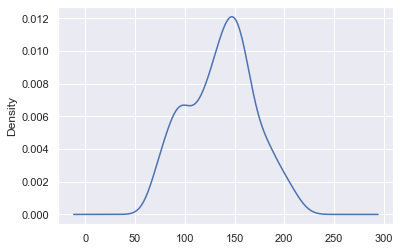

In [11]:
# Density graph shows how the data is distributed over the period of time.
ausbeer.plot(kind='kde')
pyplot.show()

Augmented Dickey–Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller
X = ausbeer.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.282661
p-value: 0.177621
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


Above graphs show monthly beer production over the perid of long time from 1956 to 1994. The data clearly has seasonality and trend which is changing over time. It shows upward trend in the begining and then trend moves downward towards the end.

It is not stationarity because there is a trend and seasonality. ADF test shows that p-value is 0.18 which is higher than p>0.05. Also, it has variying mean values.
 

Plot an autocorrelation function graph of this time series. Is data autocorrelated or not?

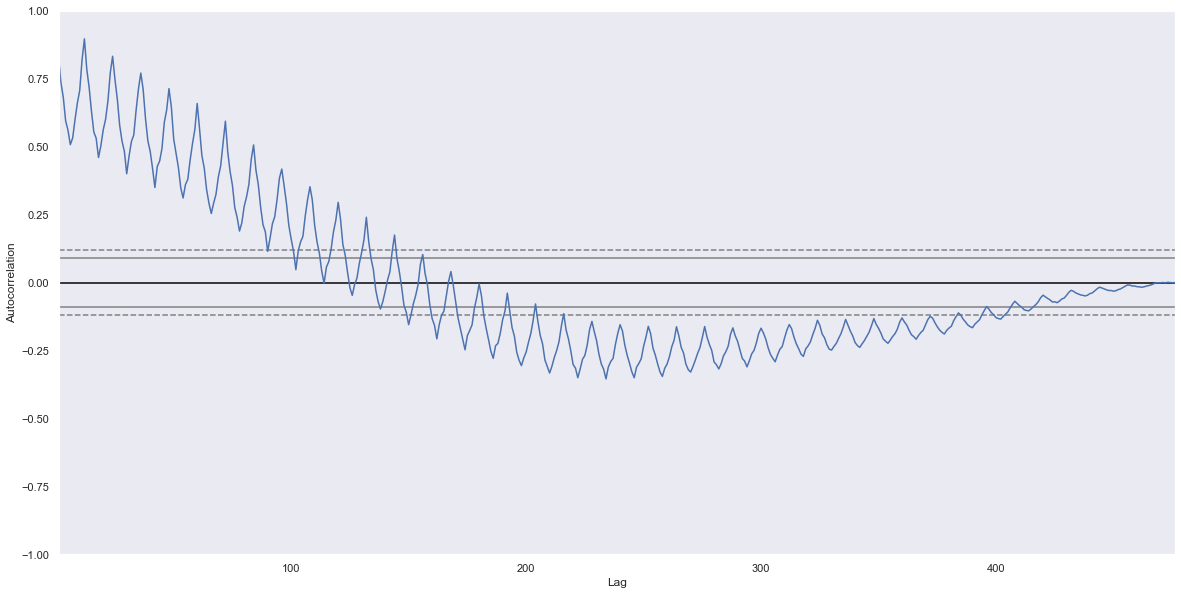

In [13]:
from pandas.plotting import autocorrelation_plot
plt.rc('figure', figsize=(20, 10))
autocorrelation_plot(ausbeer)

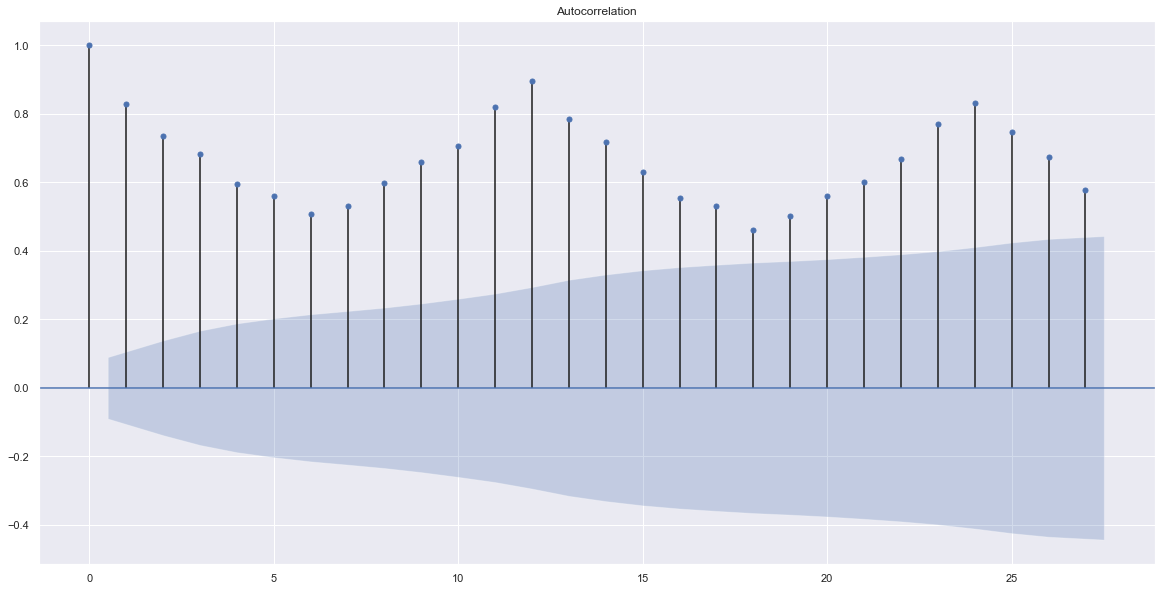

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ausbeer)
pyplot.show()

We can see that the data is positively autocorrelated in the first 100 month. The graph also confirms that there is trend and seasonality in the data.

In [15]:
ausbeer.autocorr()

0.8303550763967799

In [16]:
ausbeer.autocorr(lag =25)

0.8105634617829126

In [17]:
ausbeer.autocorr(lag =390)

-0.6898630633370977

 When there is a trend in data, the autocorrelations for small lags tend to be large and positive because obervations nearby in the time are also nearby in size. So, ACF of trended time series tend to have positive values that slowly decrease as the lags increase. when data are both trended and seasonal, can see combination of these effects. ( it is evident in the above graphs)

In the above graph ( X - axis = Lag, this is the months that are observed) and Y - Autocorrelation . As you could see, the data lines are above and below the first quartile, or within the 95% confidence interval. This is a indicator of significance correlation.


Perform differencing on the time series - calculate the difference of each element of the Series compared with another element in the Series (you can use the default setting of the function which calculates the difference with the element in the previous row). You can use either function diff()  or shift() 

In [18]:
# Using diff() function
diff_da= ausbeer.diff ()

In [19]:
diff_da.head()

Month
1956-01-01     NaN
1956-02-01     2.8
1956-03-01    -0.8
1956-04-01   -18.1
1956-05-01    -6.2
Name: Monthly beer production, dtype: float64

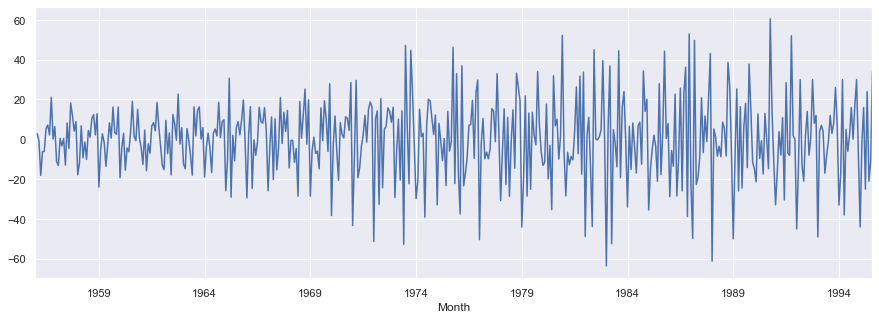

In [20]:
plt.rc('figure', figsize=(15, 5))
diff_da.plot();

Remove null values

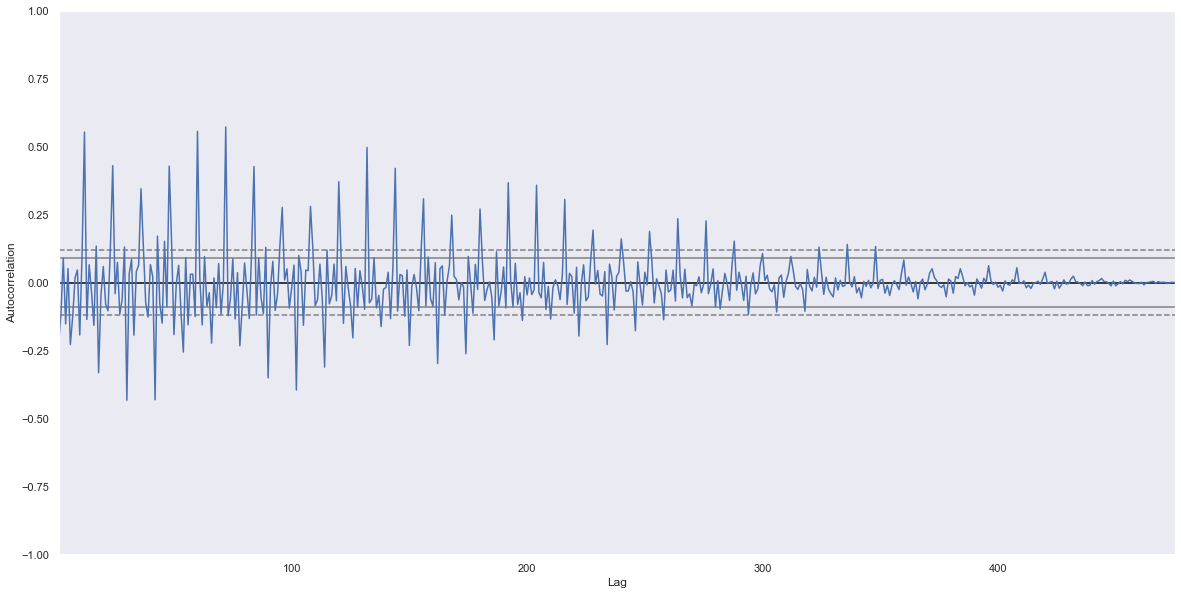

In [29]:
plt.rc('figure', figsize=(20, 10))
autocorrelation_plot(diff_da.dropna())

In [30]:
# Using shift() function
ausbeer_shifted = ausbeer - ausbeer.shift(1)
ausbeer_shifted.head()

Month
1956-01-01     NaN
1956-02-01     2.8
1956-03-01    -0.8
1956-04-01   -18.1
1956-05-01    -6.2
Name: Monthly beer production, dtype: float64

Plot a time plot and an autocorrelation function graph of this new time series. Is data autocorrelated or not? Is it stationary?

HINT: Autocorrelation function will not display any data if Series contain any missing values. Make sure that you deal with NaNs before plotting.

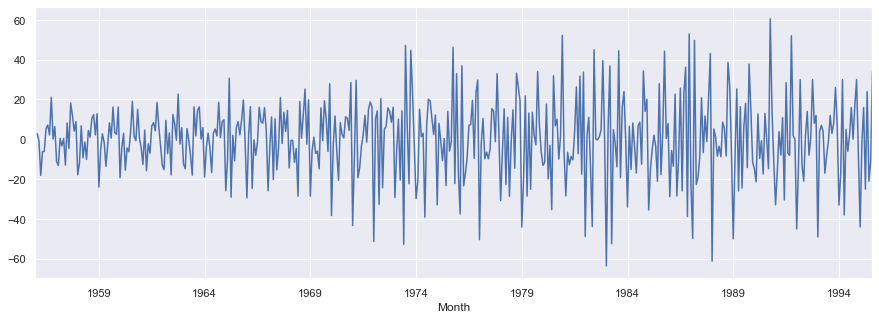

In [31]:
plt.rc('figure', figsize=(15, 5))
ausbeer_shifted.plot();

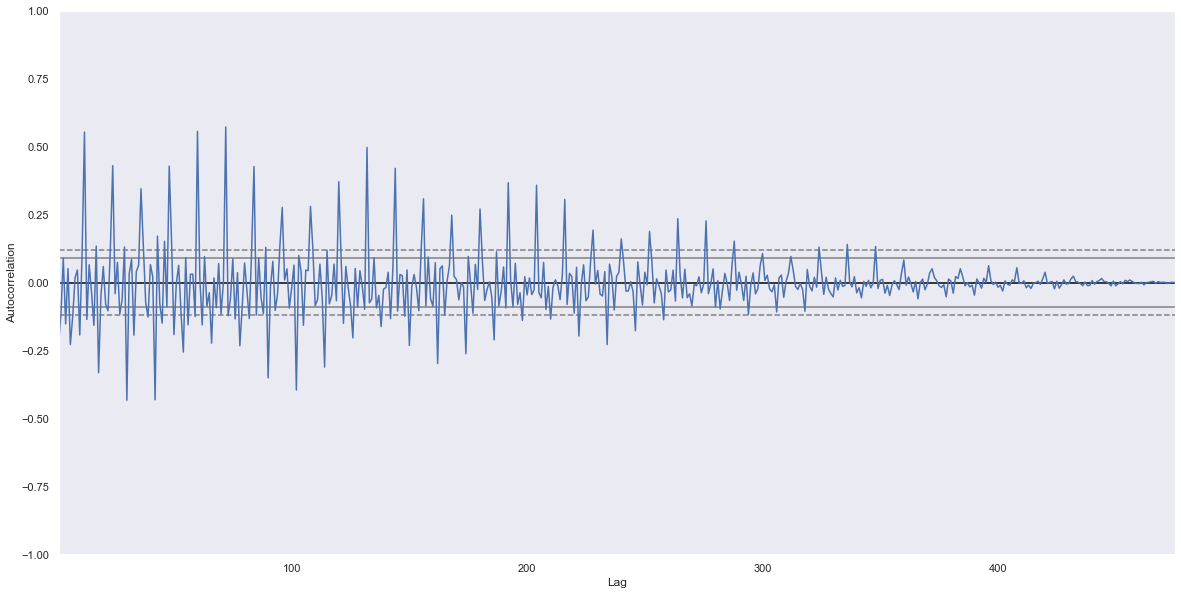

In [32]:
plt.rc('figure', figsize=(20, 10))
autocorrelation_plot(ausbeer_shifted.dropna())

In [34]:
rol_mean = diff_da.rolling(window =12).mean()
rol_mean

Month
1956-01-01         NaN
1956-02-01         NaN
1956-03-01         NaN
1956-04-01         NaN
1956-05-01         NaN
                ...   
1995-04-01    0.083333
1995-05-01    1.666667
1995-06-01    0.416667
1995-07-01   -0.666667
1995-08-01    0.833333
Name: Monthly beer production, Length: 476, dtype: float64

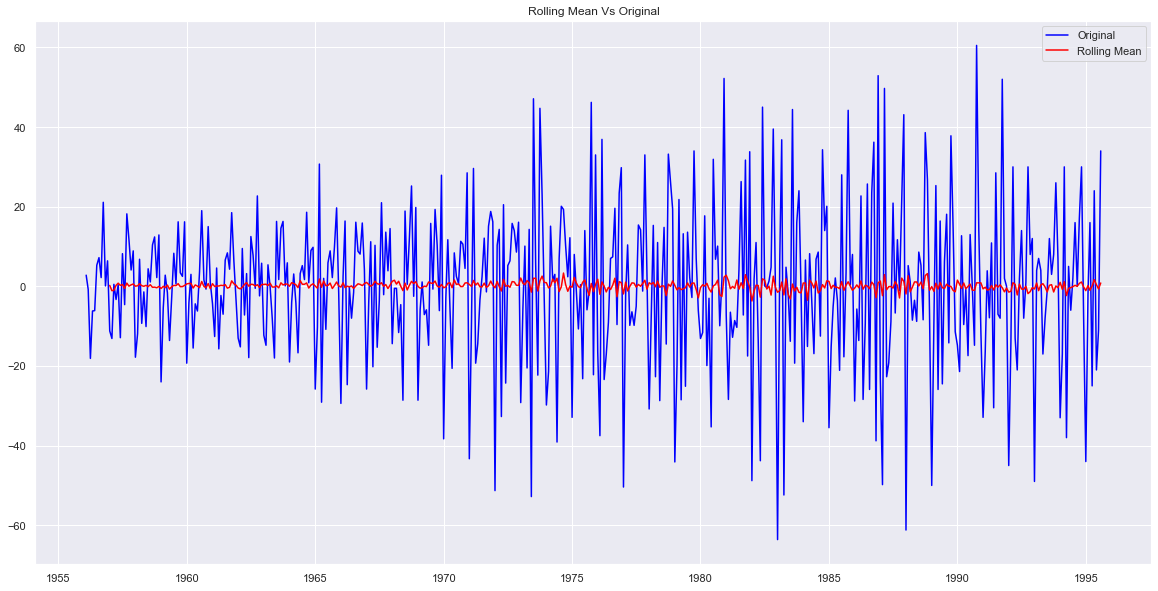

In [35]:
Orig = plt.plot(diff_da, color = 'blue', label = 'Original')
mean = plt.plot (rol_mean, color ='red', label ='Rolling Mean')
plt.legend (loc ='best')
plt.title ('Rolling Mean Vs Original')
plt.show(block=False)

There seems to be no correlation in the "new data" set.
It is stationarity because ADF test shows that p-value is 0.00002 lower than p>0.05 and data doesn't have unit root. Therefore, reject null - hypothesis. Also, it has a somewhat constant mean value as well.

Simple validation of stationarity for the differenced time series. Split the time series into 2 subsets and calculate mean and variance for each subset. Can we make any conclusion about stationarity of the time series based on this calculation?

In [36]:
# splitting TS in 2 parts
diff_da = diff_da.dropna()

ausbeer_split1, ausbeer_split2 = diff_da.values[:int(len(diff_da)*0.5)],diff_da.values[int(len(diff_da)*0.5):]

In [37]:
ausbeer_split1.mean()

0.40168776371308024

In [38]:
ausbeer_split1.var()

238.82987056917517

In [39]:
ausbeer_split2.mean()

-0.148739495798319

In [40]:
ausbeer_split2.var()

531.3024143775157

Based on the calculations of mean and variance of both parts of the time series, we can conclude that even after the differencing the TS is still non-stationary. However, let's calculate the Augmented Dickey–Fuller test results and validate.

Using the Augmented Dickey–Fuller test, calculate ADF Statistic value, p-value and critical values for the original time series and time series you get in Task 4. Describe the result. 

Augmented Dickey–Fuller test

In [43]:
from statsmodels.tsa.stattools import adfuller
X = ausbeer.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.282661
p-value: 0.177621
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [44]:
adf_shifted = adfuller(ausbeer_shifted.dropna())
print('ADF Statistic: %f' % adf_shifted[0])
print('p-value: %f' % adf_shifted[1])
print('Critical Values:')
for key, value in adf_shifted[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.980664
p-value: 0.000024
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


## END